# Section #1: Introduction

## How cool would it be if you could predict the price of a stock ticker for the following day? 

### This project's goal is to predict whether or not the VIX will go up or not the following day. 

The VIX is called the stock market "fear indicator", if the VIX is at 20 or above most stocks will go down. Knowing whether it will go up or not the following day would be invaluable when trading stocks.

Here is more info on the VIX - as it would take a 15 page white paper to explain:
https://www.investopedia.com/articles/active-trading/070213/tracking-volatility-how-vix-calculated.asp


### After talking to several stock traders and investors and doing my own research I looked for postive correlations for the following 53 stock tickers:

MSFT ,
Amazon,
FB,
Netflix,
Google,
SP,
Apple,
Voo,
Bitcoin,
USO ( us oil,
EUR/USD,
GLD,
SPX,
SLV,
YUMA ( copper ),
ITOT,
IWB,
RSP,
SCHX,
SPY,
USMV,
VIG,
VTI,
VV,
IVV,
AAL,
JJC,
ECA,
MTDR,
XLE,
OIH,
VDE,
APD,
UNVR,
EMN,
XLI,
VIS,
FIDU,
CNBKA,
RILY,
GHL,
XLF,
VFH,
KRE,
INTC,
APPN,
SSNC,
XLK,
VGT,
IYW,
Nasdaq compostie IXIC,
NYSE composite ( down jones ) ticker NYA,
Japan stock JPXGY

#### For all of the above 53 stocks I got 1 - 5 years worth of end of day historical stock data from one of the following data sources:
IEX API - using self written Python Script
Quandl - Using self written Python Script
Yahoo Finance for VIX

All data was Cleaned up and explored for postive correlations. I used a positve score of 50 or better to make the final list of stocks to use for predicting the VIX. Here are the final 10 features ( stocks ) that I used to predict the VIX:

IVV,
RSP,
SCHX,
SPY,
VOO,
VTI,
XLE,
XLI,
XLK 

I also created an 11th feature using Pandas .shift method called "VIX High_Price_Tomorrow" to try and predict whether or not the VIX would spike or drop the following day.


I tried ARIMA time forecasting with time series but think that may be something I should try next once I have tackled this challenge using my existing approach.

# Important Findings

The model was able to predict with greater than 50% accuracy the trend direction of the VIX for the following day.

 I used the Lasso Regression algorith as it performed slightly better than a Ridge Regression algorithm

# Challenges


##### I didn't want to spend any money on data for this model ( just yet ), finding free data that I could use was challenging at first but was overcome with the above data resources.

##### Another challenge was cleaning the data as the data from 3 different sources had missing data and different column names etc. This was a great challenge to improve my data cleaning abilities.

##### The toughest challenge was handling the .shift NAN data. I may not have handle this correctly and would love any feedback or input regarding how to handle this better. The algorithm appears to work well as it is, but improvements would be amazing! The challenge was not being able to run the alrorithm with the NAN, you can see my solution below.

# Motivation

##### I love trend trading stocks and have been fairly successful at it thus far. How cool would it be to KNOW the trend for the following day ahead of everyone else?!?!

##### I feel coding and Machine Learning give you the closest thing you can posses to superhumna abilities. I think over time this algorithm will help me make money with stocks. The challenge was great in and of itself, but having a trained model to predict the trend of the VIX is amazing!

Who doesn't like a little more money :-)

# Section 2 


## Library Imports

In [1447]:
# Numpy for numerical computing
import numpy as np

# Pandas for DataFrames
import pandas as pd 
pd.set_option('display.max_columns', 100)

# Matplotlib for visualization
from matplotlib import pyplot as plt

# display plots in the notebook
%matplotlib inline

# Seaborn for easier visualization
import seaborn as sns

# Function for splitting training and test set
from sklearn.model_selection import train_test_split

# Import Regularized Regression algos
from sklearn.linear_model import Lasso, Ridge, ElasticNet

# Import Tree Ensemble algos
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Function for splitting training and test set
from sklearn.model_selection import train_test_split

# Show all values in Pandas as numbers with 3 decimals
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Function for creating model pipelines
from sklearn.pipeline import make_pipeline

# For standardization
from sklearn.preprocessing import StandardScaler

# Helper for cross-validation
from sklearn.model_selection import GridSearchCV

# Helper to calculate R2 on the test set
from sklearn.metrics import r2_score

# Another metric to help pick best model Mean Absolute Error MAE
from sklearn.metrics import mean_absolute_error

# Another metric to help pick the best model Mean Squared Error
from sklearn.metrics import mean_squared_error

# Check for model fitting errors
from sklearn.exceptions import NotFittedError

# Save the winning model's pipeline
import pickle 

# Section 3

## Exploratory Analysis

In [1448]:
# Load Vix historical data for the past year - Two vix as we will use 'vix_df_2' to grab the header for 'vix_df'
vix_df = pd.read_csv('vixcurrent.csv', header=None )
vix_df_2 = pd.read_csv('vixcurrent.csv', header=None )

In [1449]:
# Grav vix_df_2 first row and set it as the 'vix_df' header
new_header = vix_df_2.iloc[0]
vix_df.columns = new_header

In [1450]:
# Remove first row of 'vix_df' as it shows up as it is a duplicate of the header
vix_df = vix_df.iloc[1:]

In [1451]:
# Convert 'Date' object to 'Date' datetime object to allow easier filtering
vix_df['Date'] = pd.to_datetime(vix_df['Date'])

# Create Data Filter Mask

In [1452]:
# Set the start and end dates that we will use to slice the VIX historical data
# start_date = '06-24-2014'
# end_date = '06-24-2019'

In [1453]:
# Create maske to filter the 'vix_df' - may not need this step 
# mask = (vix_df['Date'] >= start_date) & (vix_df['Date'] <= end_date)

In [1454]:
# Rename column 'High' to 'VIX High'
vix_df.rename(columns={'High': 'VIX High'}, inplace=True)

In [1455]:
# Dropping the Open, Low, Close, Adj CLose, and Volume columns
vix_df = vix_df.drop(['Open', 'Low', 'Close', 'Adj Close', 'Volume'], axis=1)

In [1456]:
# Checking vix_df for nan values - should be false
print(vix_df.isnull().values.any())

False


In [1457]:
# Convert the vix_df dataframe from an object arrary into a float arrary
vix_df['Date'] = vix_df['Date'].values.astype(float)
vix_df = vix_df.astype(np.float)

# Section 4

## Data Cleaning

# Clean each of the following 9 data input sources:
### IVV, RSP, SCHX, SPY, VOO, VTI, XLE, XLI, XLK

### Start IVV data cleaning

In [1458]:
# Get 1 year of IVV data
IVV_data_df = pd.read_json('IVV_current.json') # Get this data from IEX API

# Adding a new column as a datetime object
IVV_data_df['DateTime'] = pd.to_datetime(IVV_data_df['date'])

# Drop all columns except for 'DateTime' and "Volume"
IVV_data_df = IVV_data_df.drop(['change','changeOverTime','changePercent','close','date','high','label','low','open','uClose','uHigh','uLow','uOpen','uVolume'], axis=1)

In [1459]:
# Convert vix_df['Date'] to be float Data type
IVV_data_df['DateTime'].isin(vix_df['Date'])

# Filter against 'vix_df' records
IVV_data_df = IVV_data_df[IVV_data_df['DateTime'].isin(vix_df['Date'])]

In [1460]:
# Check IVV_data_df columns for NANs
print(IVV_data_df.columns[IVV_data_df.isna().any()].tolist())

# Check vix_df columns for NANs
print(vix_df.columns[vix_df.isna().any()].tolist())

[]
[]


In [1461]:
# Verify no Nan are present in 'IVV_data_df' data
print(IVV_data_df.isnull().sum())

volume      0
DateTime    0
dtype: int64


In [1462]:
IVV_data_df.tail()

,volume,DateTime
246,4408953,2019-06-20
247,3628064,2019-06-21
248,3549268,2019-06-24
249,2975598,2019-06-25
250,4210219,2019-06-26


In [1463]:
# Save the cleaned up data_df to the final data folder, save the index
IVV_data_df.to_csv('IVV_cleaned_data_df.csv',index=False)

# End IVV Data Cleaning

### Start RSP Data Cleaning

In [1464]:
# Get 1 year of RSP data
RSP_data_df = pd.read_json('RSP_current.json') # Get this data from IEX API

# Adding a new column as a datetime object
RSP_data_df['DateTime'] = pd.to_datetime(RSP_data_df['date'])

# Drop all columns except for 'DateTime' and "Volume"
RSP_data_df = RSP_data_df.drop(['change','changeOverTime','changePercent','close','date','high','label','low','open','uClose','uHigh','uLow','uOpen','uVolume'], axis=1)

In [1465]:
# Remove extra records from 'RSP_data_df' not found in the 'vix_df'
RSP_data_df['DateTime'].isin(vix_df['Date'])
RSP_data_df = RSP_data_df[RSP_data_df['DateTime'].isin(vix_df['Date'])]

In [1466]:
# Check 'RSP_data_df' columns for NANs
print(RSP_data_df.columns[RSP_data_df.isna().any()].tolist())
# Check 'vix_df' columns for NANs
print(vix_df.columns[vix_df.isna().any()].tolist())

[]
[]


In [1467]:
# Verify Nans were removed
print(RSP_data_df.isnull().sum())

volume      0
DateTime    0
dtype: int64


In [1468]:
# Save the cleaned up data_df to the final data folder, save the index
RSP_data_df.to_csv('RSP_cleaned_data_df.csv',index=False)

# End of RSP Data Cleaning

### Start SCHX Data Cleaning

In [1469]:
# Get 1 year of SCHX data
SCHX_data_df = pd.read_json('SCHX_current.json') # Get this data from IEX API

# Adding a new column as a datetime object
SCHX_data_df['DateTime'] = pd.to_datetime(SCHX_data_df['date'])

# Drop all columns except for 'DateTime' and "Volume"
SCHX_data_df = SCHX_data_df.drop(['change','changeOverTime','changePercent','close','date','high','label','low','open','uClose','uHigh','uLow','uOpen','uVolume'], axis=1)

In [1470]:
# Remove the extra records from 'SCHX_data_df' not found in the 'vix_df'
SCHX_data_df['DateTime'].isin(vix_df['Date'])
SCHX_data_df = SCHX_data_df[SCHX_data_df['DateTime'].isin(vix_df['Date'])]

In [1471]:
# Check 'SCHX_data_df' columns for NANs
print(SCHX_data_df.columns[SCHX_data_df.isna().any()].tolist())
# Check 'vix_df' columns for NANs
print(vix_df.columns[vix_df.isna().any()].tolist())

[]
[]


In [1472]:
# Verify Nan were removed
print(SCHX_data_df.isnull().sum())

volume      0
DateTime    0
dtype: int64


In [1473]:
# Save the cleaned up data_df to the final data folder, save the index
SCHX_data_df.to_csv('SCHX_cleaned_data_df.csv',index=False)

# End of SCHX Data Cleaning

### Start SPY Data Cleaning

In [1474]:
# Get 1 year of SPY data
SPY_data_df = pd.read_json('SPY_current.json') # Get this data from IEX API

# Adding a new column as a datetime object
SPY_data_df['DateTime'] = pd.to_datetime(SPY_data_df['date'])

# Drop all columns except for 'DateTime' and "Volume"
SPY_data_df = SPY_data_df.drop(['change','changeOverTime','changePercent','close','date','high','label','low','open','uClose','uHigh','uLow','uOpen','uVolume'], axis=1)

In [1475]:
# Remove the extra 'SPY_data_df' records that are not in 'vix_df'
SPY_data_df['DateTime'].isin(vix_df['Date'])
SPY_data_df = SPY_data_df[SPY_data_df['DateTime'].isin(vix_df['Date'])]

In [1476]:
# Check 'SPY_data_df' columns for NANs
print(SPY_data_df.columns[SPY_data_df.isna().any()].tolist())
# Check 'vix_df' columns for NANs
print(vix_df.columns[vix_df.isna().any()].tolist())

[]
[]


In [1477]:
# Verify Nan were removed
print(SPY_data_df.isnull().sum()) # Displays the total number of NANs per column

volume      0
DateTime    0
dtype: int64


In [1478]:
# Save the cleaned up data_df to the final data folder, save the index
SPY_data_df.to_csv('SPY_cleaned_data_df.csv',index=False)

# End of SPY Data Cleaning

### Start VOO Data Cleaning

In [1479]:
# Get 1 year of VOO data
VOO_data_df = pd.read_json('VOO_current.json') # Get this data from IEX API

# Adding a new column as a datetime object
VOO_data_df['DateTime'] = pd.to_datetime(VOO_data_df['date'])

# Drop all columns except for 'DateTime' and "Volume"
VOO_data_df = VOO_data_df.drop(['change','changeOverTime','changePercent','close','date','high','label','low','open','uClose','uHigh','uLow','uOpen','uVolume'], axis=1)

In [1480]:
# Remove the extra 'VOO_data_df' records that are not in the 'vix_df'
VOO_data_df['DateTime'].isin(vix_df['Date'])
VOO_data_df = VOO_data_df[VOO_data_df['DateTime'].isin(vix_df['Date'])]

In [1481]:
# Check 'VOO_data_df' columns for NANs
print(VOO_data_df.columns[VOO_data_df.isna().any()].tolist())
# Check 'vix_df' columns for NANs
print(vix_df.columns[vix_df.isna().any()].tolist())

[]
[]


In [1482]:
# Verify Nan are removed
print(VOO_data_df.isnull().sum()) # Displays the total number of NANs per column

volume      0
DateTime    0
dtype: int64


In [1483]:
# Save the cleaned up data_df to the final data folder, save the index
VOO_data_df.to_csv('VOO_cleaned_data_df.csv',index=False)

# End of VOO Data Cleaning

### Start VTI Data Cleaning

In [1484]:
# Get 1 year of VTI data
VTI_data_df = pd.read_json('VTI_current.json') # Get this data from IEX API

# Adding a new column as a datetime object
VTI_data_df['DateTime'] = pd.to_datetime(VTI_data_df['date'])

# Drop all columns except for 'DateTime' and "Volume"
VTI_data_df = VTI_data_df.drop(['change','changeOverTime','changePercent','close','date','high','label','low','open','uClose','uHigh','uLow','uOpen','uVolume'], axis=1)

In [1485]:
# Remove the extra 'VTI_data_df' records that are not in the 'vix_df'
VTI_data_df['DateTime'].isin(vix_df['Date'])
VTI_data_df = VTI_data_df[VTI_data_df['DateTime'].isin(vix_df['Date'])]

In [1486]:
# Check 'VTI_data_df' columns for NANs
print(VTI_data_df.columns[VTI_data_df.isna().any()].tolist())
# Check 'vix_df' columns for NANs
print(vix_df.columns[vix_df.isna().any()].tolist())

[]
[]


In [1487]:
# Verify Nan are removed
print(VTI_data_df.isnull().sum()) # Displays the total number of NANs per column

volume      0
DateTime    0
dtype: int64


In [1488]:
# Save the cleaned up data_df to the final data folder, save the index
VTI_data_df.to_csv('VTI_cleaned_data_df.csv',index=False)

# End of VTI Data Cleaning

### Start XLE Data Cleaning

In [1489]:
# Get 1 year of XLE data
XLE_data_df = pd.read_json('XLE_current.json') # Get this data from IEX API

# Adding a new column as a datetime object
XLE_data_df['DateTime'] = pd.to_datetime(XLE_data_df['date'])

# Drop all columns except for 'DateTime' and "Volume"
XLE_data_df = XLE_data_df.drop(['change','changeOverTime','changePercent','close','date','high','label','low','open','uClose','uHigh','uLow','uOpen','uVolume'], axis=1)

In [1490]:
# Remove the extra 'XLE_data_df' records that are not in the 'vix_df'
XLE_data_df['DateTime'].isin(vix_df['Date'])
XLE_data_df = XLE_data_df[XLE_data_df['DateTime'].isin(vix_df['Date'])]

In [1491]:
# Check 'XLE_data_df' columns for NANs
print(XLE_data_df.columns[XLE_data_df.isna().any()].tolist())
# Check 'vix_df' columns for NANs
print(vix_df.columns[vix_df.isna().any()].tolist())

[]
[]


In [1492]:
# Verify Nan are removed
print(XLE_data_df.isnull().sum()) # Displays the total number of NANs per column

volume      0
DateTime    0
dtype: int64


In [1493]:
# Save the cleaned up data_df to the final data folder, save the index
XLE_data_df.to_csv('XLE_cleaned_data_df.csv',index=False)

# End of XLE Data Cleaning

### Start XLI Data Cleaning

In [1494]:
# Get 1 year of XLI data
XLI_data_df = pd.read_json('XLI_current.json') # Get this data from IEX API

# Adding a new column as a datetime object
XLI_data_df['DateTime'] = pd.to_datetime(XLI_data_df['date'])

# Drop all columns except for 'DateTime' and "Volume"
XLI_data_df = XLI_data_df.drop(['change','changeOverTime','changePercent','close','date','high','label','low','open','uClose','uHigh','uLow','uOpen','uVolume'], axis=1)

In [1495]:
# Remove the extra 'XLI_data_df' records that are not in the 'vix_df'
XLI_data_df['DateTime'].isin(vix_df['Date'])
XLI_data_df = XLI_data_df[XLI_data_df['DateTime'].isin(vix_df['Date'])]

In [1496]:
# Check 'XLI_data_df' columns for NANs
print(XLI_data_df.columns[XLI_data_df.isna().any()].tolist())
# Check 'vix_df' columns for NANs
print(vix_df.columns[vix_df.isna().any()].tolist())

[]
[]


In [1497]:
# Verify Nan are removed
print(XLI_data_df.isnull().sum()) # Displays the total number of NANs per column

volume      0
DateTime    0
dtype: int64


In [1498]:
# Save the cleaned up data_df to the final data folder, save the index
XLI_data_df.to_csv('XLI_cleaned_data_df.csv',index=False)

# End of XLI Data Cleaning

### Start XLK Data Cleaning

In [1499]:
# Get 1 year of XLK data
XLK_data_df = pd.read_json('XLK_current.json') # Get this data from IEX API

# Adding a new column as a datetime object
XLK_data_df['DateTime'] = pd.to_datetime(XLK_data_df['date'])

# Drop all columns except for 'DateTime' and "Volume"
XLK_data_df = XLK_data_df.drop(['change','changeOverTime','changePercent','close','date','high','label','low','open','uClose','uHigh','uLow','uOpen','uVolume'], axis=1)

In [1500]:
# Remove the extra 'XLK_data_df' records that are not in the 'vix_df'
XLK_data_df['DateTime'].isin(vix_df['Date'])
XLK_data_df = XLK_data_df[XLK_data_df['DateTime'].isin(vix_df['Date'])]

In [1501]:
# Check 'XLK_data_df' columns for NANs
print(XLK_data_df.columns[XLK_data_df.isna().any()].tolist())
# Check 'vix_df' columns for NANs
print(vix_df.columns[vix_df.isna().any()].tolist())

[]
[]


In [1502]:
# Verify Nan are removed
print(XLK_data_df.isnull().sum()) # Displays the total number of NANs per column

volume      0
DateTime    0
dtype: int64


In [1503]:
# Save the cleaned up data_df to the final data folder, save the index
XLK_data_df.to_csv('XLK_cleaned_data_df.csv',index=False)

# End of XLK Data Cleaning

# Grab Latest Volume for current date for all 9 features

In [1504]:
# Make an API call to get the latest volume for current date and append to bottom of '_cleaned_data_df.csv'
# Script to get the latest stock volume and for current date
# import IEX_Stock_Latest_Price
# !python IEX_Stock_Latest_Price.py

# START HERE! make sure script stll loads after here and figure out if handling NAN correctly or not
# ask in stack overflow

# Read in all 9 cleaned data sources with Volume and DateTime features ( Columns )
### IVV, RSP, SCHX, SPY, VOO, VTI, XLE, XLI, XLK

### Read in IVV_cleaned_data_df

In [1505]:
# Read in all 9 cleaned data sources
IVV_data_df = pd.read_csv('IVV_cleaned_data_df.csv')
RSP_data_df = pd.read_csv('RSP_cleaned_data_df.csv')
SCHX_data_df = pd.read_csv('SCHX_cleaned_data_df.csv')
SPY_data_df = pd.read_csv('SPY_cleaned_data_df.csv')
VOO_data_df = pd.read_csv('VOO_cleaned_data_df.csv')
VTI_data_df = pd.read_csv('VTI_cleaned_data_df.csv')
XLE_data_df = pd.read_csv('XLE_cleaned_data_df.csv')
XLI_data_df = pd.read_csv('XLI_cleaned_data_df.csv')
XLK_data_df = pd.read_csv('XLK_cleaned_data_df.csv')

## Set index to DateTime, drop DateTime column for all 10 data sources

In [1506]:
# Create data frame variable
df_names = [IVV_data_df, RSP_data_df, SCHX_data_df, SPY_data_df, VOO_data_df, VTI_data_df, XLE_data_df, XLI_data_df, XLK_data_df,  ]
    
# Loop over 9 cleaned data sources and changing the index to DateTime
for df in df_names:
    print(df)
    df.set_index('DateTime', inplace=True)

      volume    DateTime
0    6335395  2018-06-27
1    5285802  2018-06-28
2    7694371  2018-06-29
3    4579718  2018-07-02
4    1367814  2018-07-03
5    2605662  2018-07-05
6    2942161  2018-07-06
7    4775363  2018-07-09
8    3426772  2018-07-10
9    3781287  2018-07-11
10   3444871  2018-07-12
11   3122705  2018-07-13
12   2224098  2018-07-16
13   2322582  2018-07-17
14   3603936  2018-07-18
15   3220915  2018-07-19
16   4868554  2018-07-20
17   1880195  2018-07-23
18   2253020  2018-07-24
19   3310845  2018-07-25
20   4088761  2018-07-26
21   2798143  2018-07-27
22   4929771  2018-07-30
23   3588979  2018-07-31
24   2679918  2018-08-01
25   2327589  2018-08-02
26   2257880  2018-08-03
27   2988646  2018-08-06
28   5084693  2018-08-07
29   3483848  2018-08-08
..       ...         ...
221  3135635  2019-05-15
222  3911224  2019-05-16
223  3833735  2019-05-17
224  2515977  2019-05-20
225  3634882  2019-05-21
226  3147661  2019-05-22
227  4419359  2019-05-23
228  1809862  2019-05-24


[251 rows x 2 columns]
       volume    DateTime
0    20583866  2018-06-27
1    14285368  2018-06-28
2    13167937  2018-06-29
3    15296553  2018-07-02
4     9308177  2018-07-03
5     9969537  2018-07-05
6     9310429  2018-07-06
7    11059160  2018-07-09
8    11003761  2018-07-10
9    19362770  2018-07-11
10   12568031  2018-07-12
11   11423091  2018-07-13
12   11390744  2018-07-16
13    9753183  2018-07-17
14   15351520  2018-07-18
15   16231809  2018-07-19
16   10861317  2018-07-20
17    7623849  2018-07-23
18   10168500  2018-07-24
19   11037546  2018-07-25
20   12187385  2018-07-26
21   12642806  2018-07-27
22   11394997  2018-07-30
23   11290711  2018-07-31
24   11172625  2018-08-01
25    9689758  2018-08-02
26    7663337  2018-08-03
27    8200093  2018-08-06
28   11798340  2018-08-07
29    9401055  2018-08-08
..        ...         ...
221  10092343  2019-05-15
222   9376619  2019-05-16
223  10555799  2019-05-17
224   8186324  2019-05-20
225  18380450  2019-05-21
226   9637121  

## Combine all 10 cleaned data sources into 1 data frame

In [1507]:
# Merge ( default left join ) all 9 cleaned data sources into 1 final_df dataframe
final_df = pd.merge(IVV_data_df, RSP_data_df, on=['DateTime'], suffixes=('_IVV', '_RSP'))
final_df = pd.merge(final_df, SCHX_data_df, on=['DateTime'], suffixes=('_IVV', '_SCHX'))
final_df = pd.merge(final_df, SPY_data_df, on=['DateTime'], suffixes=('', '_SPY'))
final_df = pd.merge(final_df, VOO_data_df, on=['DateTime'], suffixes=('', '_VOO'))
final_df = pd.merge(final_df, VTI_data_df, on=['DateTime'], suffixes=('', '_VTI'))
final_df = pd.merge(final_df, XLE_data_df, on=['DateTime'], suffixes=('', '_XLE'))
final_df = pd.merge(final_df, XLI_data_df, on=['DateTime'], suffixes=('', '_XLI'))
final_df = pd.merge(final_df, XLK_data_df, on=['DateTime'], suffixes=('', '_XLK'))

In [1508]:
# Rename 'volume' column to 'volume_SCHX' as the merge creates 1 column with the name of 'volume'
final_df.rename(columns={'volume':'volume_SCHX'}, inplace=True)

In [1509]:
# Save final_df to csv so I can read it back out and change the data values - this makes converting the data types to floats easier
final_df.to_csv('final_df.csv',index=True)

In [1510]:
# Read in the final_df csv and change the data types to float
converted_data_final_df = pd.read_csv("final_df.csv",  
                 dtype={'volume_IVV': float,'volume_RSP': float, 'volume_SCHX': float, 'volume_SPY': float, 'volume_VOO': float, 'volume_VTI': float, 'volume_XLE': float, 'volume_XLI': float, 'volume_XLK': float})

In [1511]:
# Convert "DateTime" from object to datetime
converted_data_final_df['DateTime'] = pd.to_datetime(converted_data_final_df['DateTime'])

In [1512]:
# Setting the index as 'DateTime'
converted_data_final_df.set_index('DateTime', inplace=True)

In [1513]:
# Convert from float to datetime
vix_df['Date'] = pd.to_datetime(vix_df['Date'])

In [1514]:
# Set the Vix_df index as 'Date'
vix_df.set_index('Date', inplace=True)

In [1515]:
# Merge 'vix_df' into 'converted_data_final_df'
converted_data_final_df = converted_data_final_df.merge(vix_df, left_index=True, right_index=True, how='inner')

In [1516]:
converted_data_final_df.tail()

,volume_IVV,volume_RSP,volume_SCHX,volume_SPY,volume_VOO,volume_VTI,volume_XLE,volume_XLI,volume_XLK,VIX High
2019-06-20,4408953.000,853766.000,813156.000,116570017.000,3288090.000,2968296.000,25953969.000,14503224.000,13891896.000,16.030
2019-06-21,3628064.000,620376.000,790153.000,83309466.000,2225992.000,2414269.000,16356327.000,11526835.000,20715371.000,15.480
2019-06-24,3549268.000,428676.000,606602.000,47582730.000,3518370.000,1977281.000,10396671.000,8388348.000,8216118.000,15.560
2019-06-25,2975598.000,358048.000,994354.000,82028656.000,2287082.000,2309499.000,11887333.000,9267637.000,13122665.000,16.680
2019-06-26,4210219.000,382706.000,756312.000,51584902.000,2988721.000,1904009.000,14326784.000,7262692.000,9069181.000,16.500


# Feature Engineering

### VIX High_Price_Tomorrow

In [1517]:
# Create a new vix high column for tomorrow's price by copying the existing VIX High
converted_data_final_df['VIX High_Price_Tomorrow'] = (converted_data_final_df['VIX High'])

In [1518]:
# Check for missing values by (numeric) feature
print(converted_data_final_df.select_dtypes(exclude=['object']).isnull().sum())

volume_IVV                 0
volume_RSP                 0
volume_SCHX                0
volume_SPY                 0
volume_VOO                 0
volume_VTI                 0
volume_XLE                 0
volume_XLI                 0
volume_XLK                 0
VIX High                   0
VIX High_Price_Tomorrow    0
dtype: int64


In [1519]:
# # Adding 1 row of Dummy data to converted_data_final_df - so when we drop the NAN will be gone
dummy_last_row = converted_data_final_df.iloc[-1:] #grab the last row of 'converted_data_final_df'
print(dummy_last_row)
converted_data_final_df = converted_data_final_df.append(dummy_last_row)

            volume_IVV  volume_RSP  volume_SCHX   volume_SPY  volume_VOO  \
2019-06-26 4210219.000  382706.000   756312.000 51584902.000 2988721.000   

            volume_VTI   volume_XLE  volume_XLI  volume_XLK  VIX High  \
2019-06-26 1904009.000 14326784.000 7262692.000 9069181.000    16.500   

            VIX High_Price_Tomorrow  
2019-06-26                   16.500  


In [1520]:
converted_data_final_df.tail()

,volume_IVV,volume_RSP,volume_SCHX,volume_SPY,volume_VOO,volume_VTI,volume_XLE,volume_XLI,volume_XLK,VIX High,VIX High_Price_Tomorrow
2019-06-21,3628064.000,620376.000,790153.000,83309466.000,2225992.000,2414269.000,16356327.000,11526835.000,20715371.000,15.480,15.480
2019-06-24,3549268.000,428676.000,606602.000,47582730.000,3518370.000,1977281.000,10396671.000,8388348.000,8216118.000,15.560,15.560
2019-06-25,2975598.000,358048.000,994354.000,82028656.000,2287082.000,2309499.000,11887333.000,9267637.000,13122665.000,16.680,16.680
2019-06-26,4210219.000,382706.000,756312.000,51584902.000,2988721.000,1904009.000,14326784.000,7262692.000,9069181.000,16.500,16.500
2019-06-26,4210219.000,382706.000,756312.000,51584902.000,2988721.000,1904009.000,14326784.000,7262692.000,9069181.000,16.500,16.500


In [1521]:
# Adding blank row before shifting so I don't lose data
# last_date = converted_data_final_df.iloc[[1]].index
# print(type(last_date))
# converted_data_final_df = converted_data_final_df.append(pd.DataFrame(index=[last_date]))

In [1522]:
converted_data_final_df.tail()

,volume_IVV,volume_RSP,volume_SCHX,volume_SPY,volume_VOO,volume_VTI,volume_XLE,volume_XLI,volume_XLK,VIX High,VIX High_Price_Tomorrow
2019-06-21,3628064.000,620376.000,790153.000,83309466.000,2225992.000,2414269.000,16356327.000,11526835.000,20715371.000,15.480,15.480
2019-06-24,3549268.000,428676.000,606602.000,47582730.000,3518370.000,1977281.000,10396671.000,8388348.000,8216118.000,15.560,15.560
2019-06-25,2975598.000,358048.000,994354.000,82028656.000,2287082.000,2309499.000,11887333.000,9267637.000,13122665.000,16.680,16.680
2019-06-26,4210219.000,382706.000,756312.000,51584902.000,2988721.000,1904009.000,14326784.000,7262692.000,9069181.000,16.500,16.500
2019-06-26,4210219.000,382706.000,756312.000,51584902.000,2988721.000,1904009.000,14326784.000,7262692.000,9069181.000,16.500,16.500


In [1523]:
# Shift the 'VIX High_Price_Tomorrow' by -1 so we can use it to predict tomorrow's price
converted_data_final_df['VIX High_Price_Tomorrow'] = converted_data_final_df['VIX High'].shift(-1)
# converted_data_final_df['VIX High_Price_Tomorrow'] = converted_data_final_df['VIX High_Price_Tomorrow'].shift(1)


In [1524]:
converted_data_final_df.tail(10)

,volume_IVV,volume_RSP,volume_SCHX,volume_SPY,volume_VOO,volume_VTI,volume_XLE,volume_XLI,volume_XLK,VIX High,VIX High_Price_Tomorrow
2019-06-14,2000184.000,308672.000,682456.000,52324716.000,1203356.000,1401000.000,7916416.000,5966596.000,8441689.000,16.400,15.760
2019-06-17,2511178.000,287787.000,1132814.000,39205709.000,1782613.000,2506104.000,8795248.000,7708766.000,9351130.000,15.760,15.540
2019-06-18,4622740.000,564842.000,997612.000,85434823.000,2340697.000,2261097.000,17222144.000,12506299.000,16181183.000,15.540,15.710
2019-06-19,7606221.000,610867.000,949638.000,78674377.000,1684486.000,4049930.000,8827665.000,11171676.000,12371290.000,15.710,16.030
2019-06-20,4408953.000,853766.000,813156.000,116570017.000,3288090.000,2968296.000,25953969.000,14503224.000,13891896.000,16.030,15.480
2019-06-21,3628064.000,620376.000,790153.000,83309466.000,2225992.000,2414269.000,16356327.000,11526835.000,20715371.000,15.480,15.560
2019-06-24,3549268.000,428676.000,606602.000,47582730.000,3518370.000,1977281.000,10396671.000,8388348.000,8216118.000,15.560,16.680
2019-06-25,2975598.000,358048.000,994354.000,82028656.000,2287082.000,2309499.000,11887333.000,9267637.000,13122665.000,16.680,16.500
2019-06-26,4210219.000,382706.000,756312.000,51584902.000,2988721.000,1904009.000,14326784.000,7262692.000,9069181.000,16.500,16.500
2019-06-26,4210219.000,382706.000,756312.000,51584902.000,2988721.000,1904009.000,14326784.000,7262692.000,9069181.000,16.500,nan


In [1525]:
# Drop last row for all columns so I remove the one NAN row for the 'VIX High_Price_Tomorrow' column
# converted_data_final_df = converted_data_final_df[:-1]
# this is a cleaner approach
# df = df.dropna()
converted_data_final_df = converted_data_final_df.dropna()

In [1526]:
converted_data_final_df.tail()

,volume_IVV,volume_RSP,volume_SCHX,volume_SPY,volume_VOO,volume_VTI,volume_XLE,volume_XLI,volume_XLK,VIX High,VIX High_Price_Tomorrow
2019-06-20,4408953.000,853766.000,813156.000,116570017.000,3288090.000,2968296.000,25953969.000,14503224.000,13891896.000,16.030,15.480
2019-06-21,3628064.000,620376.000,790153.000,83309466.000,2225992.000,2414269.000,16356327.000,11526835.000,20715371.000,15.480,15.560
2019-06-24,3549268.000,428676.000,606602.000,47582730.000,3518370.000,1977281.000,10396671.000,8388348.000,8216118.000,15.560,16.680
2019-06-25,2975598.000,358048.000,994354.000,82028656.000,2287082.000,2309499.000,11887333.000,9267637.000,13122665.000,16.680,16.500
2019-06-26,4210219.000,382706.000,756312.000,51584902.000,2988721.000,1904009.000,14326784.000,7262692.000,9069181.000,16.500,16.500


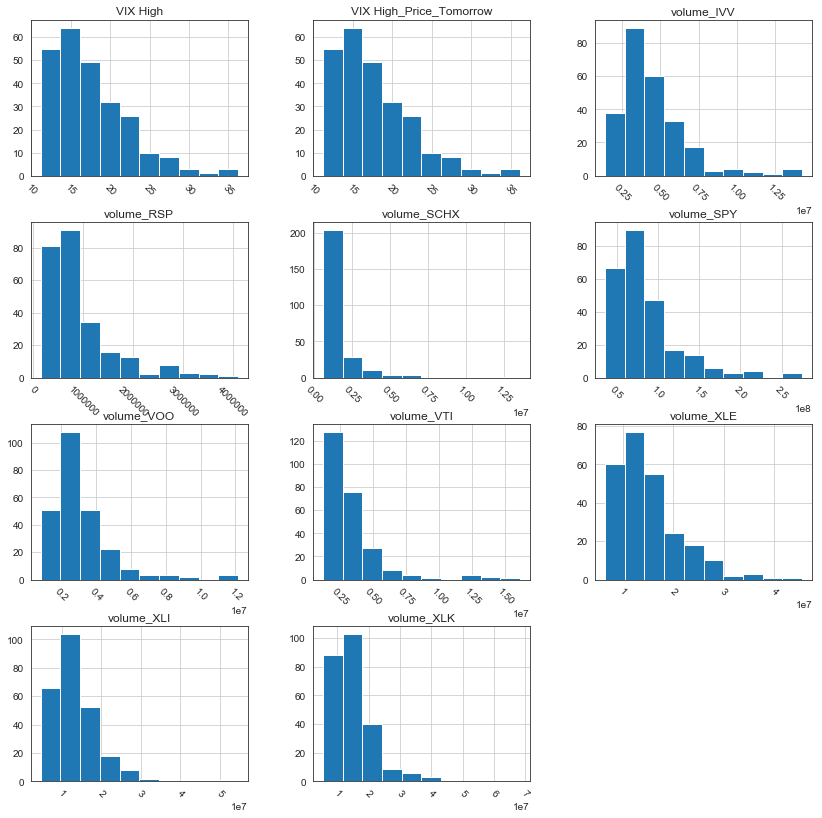

In [1527]:
# Plot histogram grid
converted_data_final_df.hist(figsize=(14, 14), xrot=-45)

# Clear the text residue
plt.show()

# vix_df['VIX Close'].hist() # Use this to plot a single column

In [1528]:
# Check 'converted_data_df' columns for NANs
print(converted_data_final_df.columns[converted_data_final_df.isna().any()].tolist())

[]


In [1529]:
# Verify Nan were removed
print(converted_data_final_df.isnull().sum()) # Displays the total number of NANs per column

volume_IVV                 0
volume_RSP                 0
volume_SCHX                0
volume_SPY                 0
volume_VOO                 0
volume_VTI                 0
volume_XLE                 0
volume_XLI                 0
volume_XLK                 0
VIX High                   0
VIX High_Price_Tomorrow    0
dtype: int64


In [1530]:
# Create data_df Correlations 
data_correlations = converted_data_final_df.corr()

In [1531]:
# Check for NAN in data_correlations
data_correlations

,volume_IVV,volume_RSP,volume_SCHX,volume_SPY,volume_VOO,volume_VTI,volume_XLE,volume_XLI,volume_XLK,VIX High,VIX High_Price_Tomorrow
volume_IVV,1.000,0.593,0.555,0.788,0.793,0.771,0.632,0.550,0.593,0.702,0.713
volume_RSP,0.593,1.000,0.511,0.650,0.630,0.629,0.520,0.490,0.487,0.656,0.630
volume_SCHX,0.555,0.511,1.000,0.569,0.559,0.622,0.439,0.445,0.473,0.565,0.554
volume_SPY,0.788,0.650,0.569,1.000,0.818,0.770,0.750,0.788,0.817,0.824,0.829
volume_VOO,0.793,0.630,0.559,0.818,1.000,0.825,0.621,0.578,0.641,0.746,0.743
volume_VTI,0.771,0.629,0.622,0.770,0.825,1.000,0.568,0.514,0.621,0.777,0.767
volume_XLE,0.632,0.520,0.439,0.750,0.621,0.568,1.000,0.653,0.628,0.649,0.676
volume_XLI,0.550,0.490,0.445,0.788,0.578,0.514,0.653,1.000,0.777,0.606,0.609
volume_XLK,0.593,0.487,0.473,0.817,0.641,0.621,0.628,0.777,1.000,0.609,0.614
VIX High,0.702,0.656,0.565,0.824,0.746,0.777,0.649,0.606,0.609,1.000,0.949


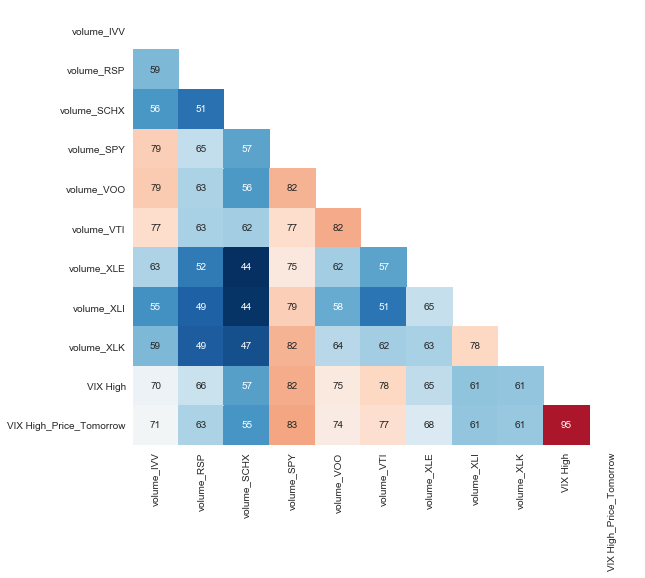

In [1532]:
# Change color scheme
sns.set_style("white")

# Generate a mask for the upper triangle
mask = np.zeros_like(data_correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Make the figsize 9 x 8
plt.figure(figsize=(9,8))

# Plot heatmap of fb_correlations
sns.heatmap(data_correlations * 100,
           annot=True, fmt='.0f',
           mask=mask,
           cmap='RdBu_r',
           cbar=False)

## Prepare ABT table

In [1533]:
# Saving Analytical base table to pass to models - Not doing this step as it removes our DateTime index
# Tt may not be important, but for now we will be using the converted_data_final_df and NOT saving an ABT table
# converted_data_final_df.to_csv('Data/Final_cleaned_data_sources/analytical_base_table.csv')

# Section 6

## Algorithm Selection

### I started with these 5 Algorithms to test and see which one best fit for this project
Lasso

Ridge Regression

Enet

Random Forest 

Grandient Boosting


### Practical benefits 
The winning Algorithm was Lasso Regression ( Least Absolute Shrinkage and Selection Operator ). 

Lasso regression is optimized for prediction, rather than inference, which makes it a great fit for our project.

Lasso regression allows you to regularize ("shrink") coefficients. This means that the estimated coefficients are pushed towards 0, to make them work better on new data-sets ("optimized for prediction"). This allows us to use complex models and avoid over-fitting at the same time.

### Lasso key hyperparamters to tune 
lasso__alpha is the key hyperparameter to tune for Lasso Regression and is the only one we tuned for this project.

# Section 7

## Model Training

In [1534]:
# I am trying 2 data sets, this is the first data set
# Create separate object for target variable - this is the value we are trying to predict ( if the number is higher we can safely assume the VIX will go up tomorrow )
y = converted_data_final_df['VIX High_Price_Tomorrow']

# Create separate object for input features - we are removing the VIX High from X
X = converted_data_final_df.drop('VIX High_Price_Tomorrow', axis=1)

In [1535]:
# I am trying 2 data sets, this is the second data set
# Create separate object for target variable - this is the value we are trying to predict ( if the number is higher we can safely assume the VIX will go up tomorrow )
yy = converted_data_final_df['VIX High_Price_Tomorrow']

# Create separate object for input features - we are removing the VIX High from XX
XX = converted_data_final_df.drop('VIX High_Price_Tomorrow', axis=1)

In [1536]:
# Checking the yy.data frame
print(yy.tail())

2019-06-20   15.480
2019-06-21   15.560
2019-06-24   16.680
2019-06-25   16.500
2019-06-26   16.500
Name: VIX High_Price_Tomorrow, dtype: float64


In [1537]:
# Checking the XX data frame
print(XX.tail())

            volume_IVV  volume_RSP  volume_SCHX    volume_SPY  volume_VOO  \
2019-06-20 4408953.000  853766.000   813156.000 116570017.000 3288090.000   
2019-06-21 3628064.000  620376.000   790153.000  83309466.000 2225992.000   
2019-06-24 3549268.000  428676.000   606602.000  47582730.000 3518370.000   
2019-06-25 2975598.000  358048.000   994354.000  82028656.000 2287082.000   
2019-06-26 4210219.000  382706.000   756312.000  51584902.000 2988721.000   

            volume_VTI   volume_XLE   volume_XLI   volume_XLK  VIX High  
2019-06-20 2968296.000 25953969.000 14503224.000 13891896.000    16.030  
2019-06-21 2414269.000 16356327.000 11526835.000 20715371.000    15.480  
2019-06-24 1977281.000 10396671.000  8388348.000  8216118.000    15.560  
2019-06-25 2309499.000 11887333.000  9267637.000 13122665.000    16.680  
2019-06-26 1904009.000 14326784.000  7262692.000  9069181.000    16.500  


In [1538]:
# Split X and y into train and test sets - using the first data set
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.2,
                                                   random_state=1234)

In [1539]:
# Confirm we have the right number of observations in each subset - using the first data set
print( len(X_train), len(X_test), len(y_train), len(y_test))

200 51 200 51


In [1540]:
# Our first data set - BEFORE standardization
X_train.describe()

,volume_IVV,volume_RSP,volume_SCHX,volume_SPY,volume_VOO,volume_VTI,volume_XLE,volume_XLI,volume_XLK,VIX High
count,200.000,200.000,200.000,200.000,200.000,200.000,200.000,200.000,200.000,200.000
mean,4335708.815,919761.555,1463910.700,84941956.715,3067113.685,3235444.075,14869533.015,13245377.170,14853311.975,17.478
std,2046785.669,692093.802,1271219.129,37375285.718,1574698.675,2120319.623,6037546.212,5139895.184,6493714.076,4.580
min,1367814.000,151177.000,558458.000,35716976.000,830910.000,1169609.000,6803809.000,5460333.000,5338114.000,11.240
25%,2992933.000,463112.500,893780.750,58636426.000,1987943.000,2033435.500,10554519.750,9527583.000,10174340.500,13.855
50%,3850977.500,700705.500,1098085.000,74305590.500,2710674.500,2623711.500,13055417.500,12215189.500,13676272.500,16.435
75%,5008538.750,1063991.750,1561223.750,102325934.500,3614970.000,3715433.500,17459251.500,15624825.500,17837150.250,19.995
max,14262694.000,4104028.000,13570521.000,255345633.000,11811553.000,16128459.000,45548907.000,34330876.000,42743594.000,36.100


In [1541]:
# Create pipelines dictionary
pipelines = {
    'lasso' : make_pipeline(StandardScaler(), Lasso(random_state=123)),
    'ridge' : make_pipeline(StandardScaler(), Ridge(random_state=123)),
    'enet' : make_pipeline(StandardScaler(), ElasticNet(random_state=123)),
    'rf' : make_pipeline(StandardScaler(), RandomForestRegressor(random_state=123)),
    'gb' : make_pipeline(StandardScaler(), GradientBoostingRegressor(random_state=123))
}

In [1542]:
# Loop over the pipelines to see that all 3 have been added
for key, value in pipelines.items():
    print(key, value)

lasso Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lasso', Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=123,
   selection='cyclic', tol=0.0001, warm_start=False))])
ridge Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('ridge', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=123, solver='auto', tol=0.001))])
enet Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('elasticnet', ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=123, selection='cyclic', tol=0.0001, warm_start=False))])
rf Pipeline(memory=None,
     steps=[('standardscaler', StandardScale

In [1543]:
# Check that all model pipelines are of the correct type
for key, value in pipelines.items():
    print(key, type(value))

lasso <class 'sklearn.pipeline.Pipeline'>
ridge <class 'sklearn.pipeline.Pipeline'>
enet <class 'sklearn.pipeline.Pipeline'>
rf <class 'sklearn.pipeline.Pipeline'>
gb <class 'sklearn.pipeline.Pipeline'>


In [1544]:
# List the tunable hyperparameters for lasso regression pipeline
pipelines['gb'].get_params()

{'memory': None,
 'steps': [('standardscaler',
   StandardScaler(copy=True, with_mean=True, with_std=True)),
  ('gradientboostingregressor',
   GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
                max_leaf_nodes=None, min_impurity_decrease=0.0,
                min_impurity_split=None, min_samples_leaf=1,
                min_samples_split=2, min_weight_fraction_leaf=0.0,
                n_estimators=100, n_iter_no_change=None, presort='auto',
                random_state=123, subsample=1.0, tol=0.0001,
                validation_fraction=0.1, verbose=0, warm_start=False))],
 'standardscaler': StandardScaler(copy=True, with_mean=True, with_std=True),
 'gradientboostingregressor': GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
              max_leaf_nodes=None, min_impurity_

In [1545]:
# Model hyperparameters to try

# Lasso hyperparameters
lasso_hyperparameters = {
    'lasso__alpha' : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]
}

# ridge hyperparameters
ridge_hyperparameters = {
    'ridge__alpha' : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]
}

# Elastic Net hyperparameters
enet_hyperparameters = {
    'elasticnet__alpha' : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10],
    'elasticnet__l1_ratio' : [0.1, 0.3, 0.5, 0.7, 0.9]
}

# Random Forest Regressor hyperparameters
rf_hyperparameters = {
    'randomforestregressor__n_estimators': [100, 200], # This is how many trees to include
    'randomforestregressor__max_features': ['auto', 'sqrt', 0.33]
}

# Gradient Boosting Regressor hyperparameters
gb_hyperparameters = {
    'gradientboostingregressor__n_estimators': [100, 200],
    'gradientboostingregressor__learning_rate': [0.05, 0.1, 0.2],
    'gradientboostingregressor__max_depth': [1, 3, 5]
}

In [1546]:
# Create hyperparameters dictionary
hyperparameters = {
    'lasso' : lasso_hyperparameters,
    'ridge' : ridge_hyperparameters,
    'enet' : enet_hyperparameters,
    'rf' : rf_hyperparameters,
    'gb': gb_hyperparameters
}

In [1547]:
# Check that hyperparameters are set up correctly
for key in ['lasso', 'ridge', 'enet', 'rf', 'gb']:
    if key in hyperparameters:
        if type(hyperparameters[key]) is dict:
            print(key, 'was found in hyperparameters, and it is a grid.')
        else:
            print(key, 'was found in hyperparameters, but it is not a grid.')
    else:
        print(key, 'was not found in hyperparameters')     

lasso was found in hyperparameters, and it is a grid.
ridge was found in hyperparameters, and it is a grid.
enet was found in hyperparameters, and it is a grid.
rf was found in hyperparameters, and it is a grid.
gb was found in hyperparameters, and it is a grid.


In [1548]:
# Fit and tune all of the models in single loop

# Create empty dictionary called fitted_models
fitted_models = {}

# Loop through model pipelines, tuning each one and saving it to fitted_models
for name, pipeline in pipelines.items():
    model = GridSearchCV(pipeline, hyperparameters[name], cv=10, n_jobs=-1)
    
    # Fit model on X_train, y_train
    model.fit(X_train, y_train)
    
    # Store model in fitted_models[name]
    fitted_models[name] = model 
    
    # Print '{name} has been fitted'
    print(name, 'has been fitted.') 

lasso has been fitted.
ridge has been fitted.
enet has been fitted.
rf has been fitted.
gb has been fitted.


In [1549]:
# Check models are of the correct type
for key, value in fitted_models.items():
    print(key, type(value))

lasso <class 'sklearn.model_selection._search.GridSearchCV'>
ridge <class 'sklearn.model_selection._search.GridSearchCV'>
enet <class 'sklearn.model_selection._search.GridSearchCV'>
rf <class 'sklearn.model_selection._search.GridSearchCV'>
gb <class 'sklearn.model_selection._search.GridSearchCV'>


In [1550]:
# Check models have been fitted correctly
for name, model in fitted_models.items():
    try:
        pred = model.predict(X_test)
        print(name, 'has been fitted.')
    except NotFittedError as e:
        print(repr(e))

lasso has been fitted.
ridge has been fitted.
enet has been fitted.
rf has been fitted.
gb has been fitted.


# Model Winer Selection

In [1551]:
# looking at each model's cross-validated performance score on the X_train data set - first data set
for name, model in fitted_models.items():
    print(name, model.best_score_)

lasso 0.8733290779055899
ridge 0.8658683649549377
enet 0.873074537945113
rf 0.841631203156549
gb 0.8480041320999914


In [1552]:
# Verify model performance for each X_test data set - first data set
# Display fitted random forest object
fitted_models['lasso']

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lasso', Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=123,
   selection='cyclic', tol=0.0001, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'lasso__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [1553]:
# Loop over all models and print the performance for each model Calculate and print R^2 and MAE using the real test data X_test
for name, model in fitted_models.items():
    pred = model.predict(X_test)
    print(name)
    print('----------')
    print( 'R^2:', r2_score(y_test, pred))
    print('MAE:', mean_absolute_error(y_test, pred))
    print('RMSE:', mean_squared_error(y_test, pred))

lasso
----------
R^2: 0.9066707220935917
MAE: 1.1066869632079552
RMSE: 2.4837249367091685
ridge
----------
R^2: 0.906424735765823
MAE: 1.1140255465906377
RMSE: 2.490271246613988
enet
----------
R^2: 0.9070112839188462
MAE: 1.107758310321758
RMSE: 2.4746617368553765
rf
----------
R^2: 0.8752257171186306
MAE: 1.3426382174509786
RMSE: 3.3205549727196773
gb
----------
R^2: 0.8666160891201401
MAE: 1.3841079740023723
RMSE: 3.5496786543266916


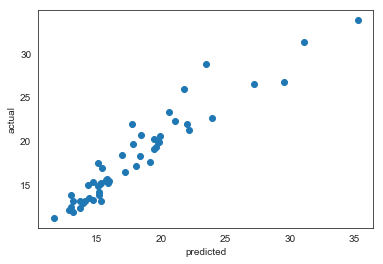

In [1554]:
# Plot the winning model RF
lasso_pred = fitted_models['lasso'].predict(X_test)
plt.scatter(lasso_pred, y_test)
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

In [1555]:
# Displaying the class of the winning model 
type(fitted_models['lasso'])

sklearn.model_selection._search.GridSearchCV

In [1556]:
# Confirm we can access the winning model pipeline
type(fitted_models['lasso'].best_estimator_)

sklearn.pipeline.Pipeline

In [1557]:
# Display the winning pipeline directly
fitted_models['lasso'].best_estimator_

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lasso', Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=123,
   selection='cyclic', tol=0.0001, warm_start=False))])

In [1558]:
# Save winning model's Pipeline
with open('VIX_UP_final_winning_model.pkl', 'wb') as f:
    pickle.dump(fitted_models['lasso'].best_estimator_, f)


## Insights & Analysis

### Winnning model was Lasso Regression
### Our best performing model was with 1 year of historical data set with 9 features


### Knowing the direction tomorrow's Vix price, originally appeared to be random and impossible to predict, but with 9 postively correlated features we got our MAE ( Mean Average Error - how much our prediction was off ) over 1 year down to 0.976, less than $1.

### I learned how important it is to exlplore lots of data sets in order to find postive correlations. I also learned to not assume ANYTHING! I originally thought 3 strong features with 6 months of data would perform best, I was absolutley wrong. Having the algorithm's tell you which model performed best is so enlightening!

## How to improve this project:
### I want to turn all of section 4 into 1 loop for better readability. 
### I want to research how to handle forecasting and predtions so I understand them better.
### How much exporatory notes should be left in a project to help others see what I was doing
### I want to continue looking for more strong data set correlations to make this model even stronger
### I want to make this project do all of the data fetching and handling without having to call the data from API using a seperate script
### I want to try incorporating other features that affect the vix besides just other stocks - example: behaviour economics

lasso
----------
R^2: 0.936352859983159 
MAE: 0.9765086495834842
RMSE: 1.6798896644830348

# Make prediction for tomorrow's VIX High Price

In [1559]:
# This is the value we are trying to predict
# Convert the y_test series to a df
yy.to_frame(name='yy_test')

,yy_test
2018-06-27,18.990
2018-06-28,16.510
2018-06-29,18.080
2018-07-02,16.450
2018-07-03,16.220
2018-07-05,15.450
2018-07-06,13.220
2018-07-09,13.210
2018-07-10,14.150
2018-07-11,13.330


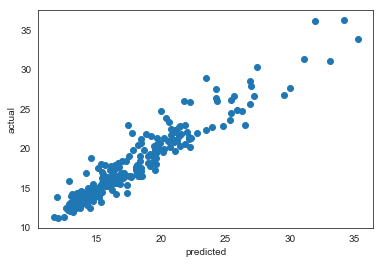

In [1560]:
# Plot the winning model Lasso - using the second data set
lasso_pred = fitted_models['lasso'].predict(XX)
plt.scatter(lasso_pred, yy)
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

In [1561]:
# Show the inputs and predicted outputs - the second data set
for i in range(len(XX)):
    print("Predicted=%s, Actual=%s" % (lasso_pred[i], yy[i]))

Predicted=18.325046667102185, Actual=18.99
Predicted=18.493299710045374, Actual=16.51
Predicted=16.608835771691457, Actual=18.08
Predicted=17.687319252201004, Actual=16.450001
Predicted=15.858613778647962, Actual=16.219999
Predicted=15.962440527242991, Actual=15.45
Predicted=15.34837107712833, Actual=13.22
Predicted=13.691154707023614, Actual=13.21
Predicted=13.37387362027328, Actual=14.15
Predicted=14.699365247621312, Actual=13.33
Predicted=13.71785303421315, Actual=12.97
Predicted=13.266161389091828, Actual=12.97
Predicted=13.154272588757564, Actual=13.18
Predicted=13.382949134817531, Actual=12.47
Predicted=13.008415541257474, Actual=13.09
Predicted=13.626454506530711, Actual=13.58
Predicted=13.960800912202753, Actual=13.55
Predicted=13.518447972386971, Actual=13.21
Predicted=13.651242288034286, Actual=12.82
Predicted=13.375951870244652, Actual=12.53
Predicted=13.029552295824272, Actual=14.26
Predicted=14.621550529085379, Actual=14.46
Predicted=14.795341689383598, Actual=14.12
Predic

In [1562]:
# Make Vix High for tomorrow:
print("Predicted=%s, Actual=%s" % (lasso_pred[-1], yy[-1]))

Predicted=16.345307297649004, Actual=16.5


In [1563]:
# Save the lasso predicted price and also the actual vix values
pd.DataFrame(lasso_pred).to_csv('josh_lasso_pred.csv',index=True)

# Save the actual values here:
yy.to_csv('josh_actual_pred.csv', index=True)